# Evaluación Parcial 1 Deep Learning

- Profesor: Felipe Zambrano

### Instrucciones generales

- Esta prohibido compartir las respuestas con otros grupos.
- Indicios de copia serán penalizados con la nota mínima.
- Cualquier duda fuera del horario de clases se debe enviar por el AVA. Mensajes al docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente, si utiliza material extra debe citarlo.

### Sobre la entrega
  * Antes de comenzar a realizar la evaluación, guarde una copia de este cuadernillo en su Google Drive (`Archivo > Guardar una copia en Drive`). No hacer esto puede implicar que su trabajo no se guarde correctamente.
  *  Debe descargar este cuardenillo de Google Colab como un archivo `.ipynb` (`Archivo > Descargar > Descargar .ipynb`). No se revisarán otros formatos de entrega. Recuerde guardar su desarrollo antes de descargar el archivo correspondiente.
  *  El archivo debe ser reproducible, o sea si cargo el archivo en Google Colab y ejecuto todas las celdas, debe reproducir los resultados que usted obtuvo.
  *  Se debe subir el archivo `.ipynb` descargado al AVA en el apartado Experiencia de Aprendizaje 1: Fundamentos de Deep Learning -> Evaluación Parcial EA1.
  *  La fecha límite de entrega es el **miércoles 14 de mayo a las 18:59 hrs**. Por cada hora de retraso, se descontará un punto de la nota final. Ejemplo: Si entrega entre 19:00 y 19:59, la nota máxima será 6.0. Si entrega entre 20:00 y 20:59, la nota máxima será 5.0, y así sucesivamente.
  *  Ante cualquier sospecha de copia, reprobarán automáticamente el curso con nota mínima (1.0) los involucrados. La discusión entre pares siempre es beneficiosa y fomenta diálogos interesantes, pero cada uno debe desarrollar su propio trabajo.
  * El cálculo de la nota de la evaluación esta dado por: $\text{Nota}=1+{\sum_{i=1}^7\text{PuntajePregunta}_i \over 7}$


### Grupo Nº
> POR FAVOR AGREGAR EL NÚMERO DE GRUPO

### Integrantes del grupo

> Francisco Egenau Navia
> Sebastian Medina
> Matias Machuca



In [ ]:
# 1. Cargar librerías

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# 2. Cargar el dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

**1.** **[6 pts]** Describa las características del dataset Fashion MNIST:
- Categorías de ropa
- Tamaño de las imágenes
- Tamaño del dataset
- Tamaño del conjunto de entrenamiento
- Tamaño del conjunto de test
- Indique si las clases están balanceadas


Tamaño de una imagen: (28, 28)
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de test: (10000, 28, 28)
T-shirt/top : 6000 imágenes
Trouser     : 6000 imágenes
Pullover    : 6000 imágenes
Dress       : 6000 imágenes
Coat        : 6000 imágenes
Sandal      : 6000 imágenes
Shirt       : 6000 imágenes
Sneaker     : 6000 imágenes
Bag         : 6000 imágenes
Ankle boot  : 6000 imágenes


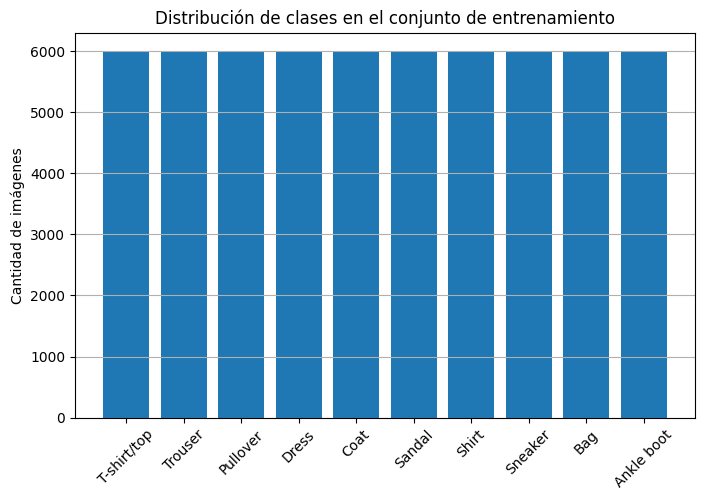

In [ ]:
# Categorias de ropa segun documentacion https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Tamano de las imagenes
print("Tamaño de una imagen:", X_train[0].shape)

#Tamano del dataset 70,000 imágenes (60,000 para entrenamiento y 10,000 para test)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)

print("Tamaño del conjunto de test:", X_test.shape)

# Contar cuántas imágenes hay por clase
unique, counts = np.unique(y_train, return_counts=True)
distribution = dict(zip([class_names[i] for i in unique], counts))

# Mostrar la distribución
for class_name, count in distribution.items():
    print(f"{class_name:12s}: {count} imágenes")

# Gráfico de barras (opcional)
plt.figure(figsize=(8,5))
plt.bar(distribution.keys(), distribution.values())
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de imágenes")
plt.grid(axis="y")
plt.show()

#TABLAS BALANCEADAS CON 6000 IMAGENES

# **✅ Conclusión del gráfico de distribución de clases:**
El gráfico presenta la cantidad de imágenes por categoría de ropa en el conjunto de entrenamiento del dataset Fashion MNIST.

Cada categoría (T-shirt/top, Trouser, Pullover, etc.) tiene exactamente 6,000 imágenes.

Esto indica que el dataset está perfectamente balanceado:
👉 No existe desbalance de clases, lo que significa que el modelo no estará sesgado hacia una clase en particular debido a una mayor cantidad de datos.



**2.** **[6 pts]** Genere una previsualización de 10 imágenes por categoría

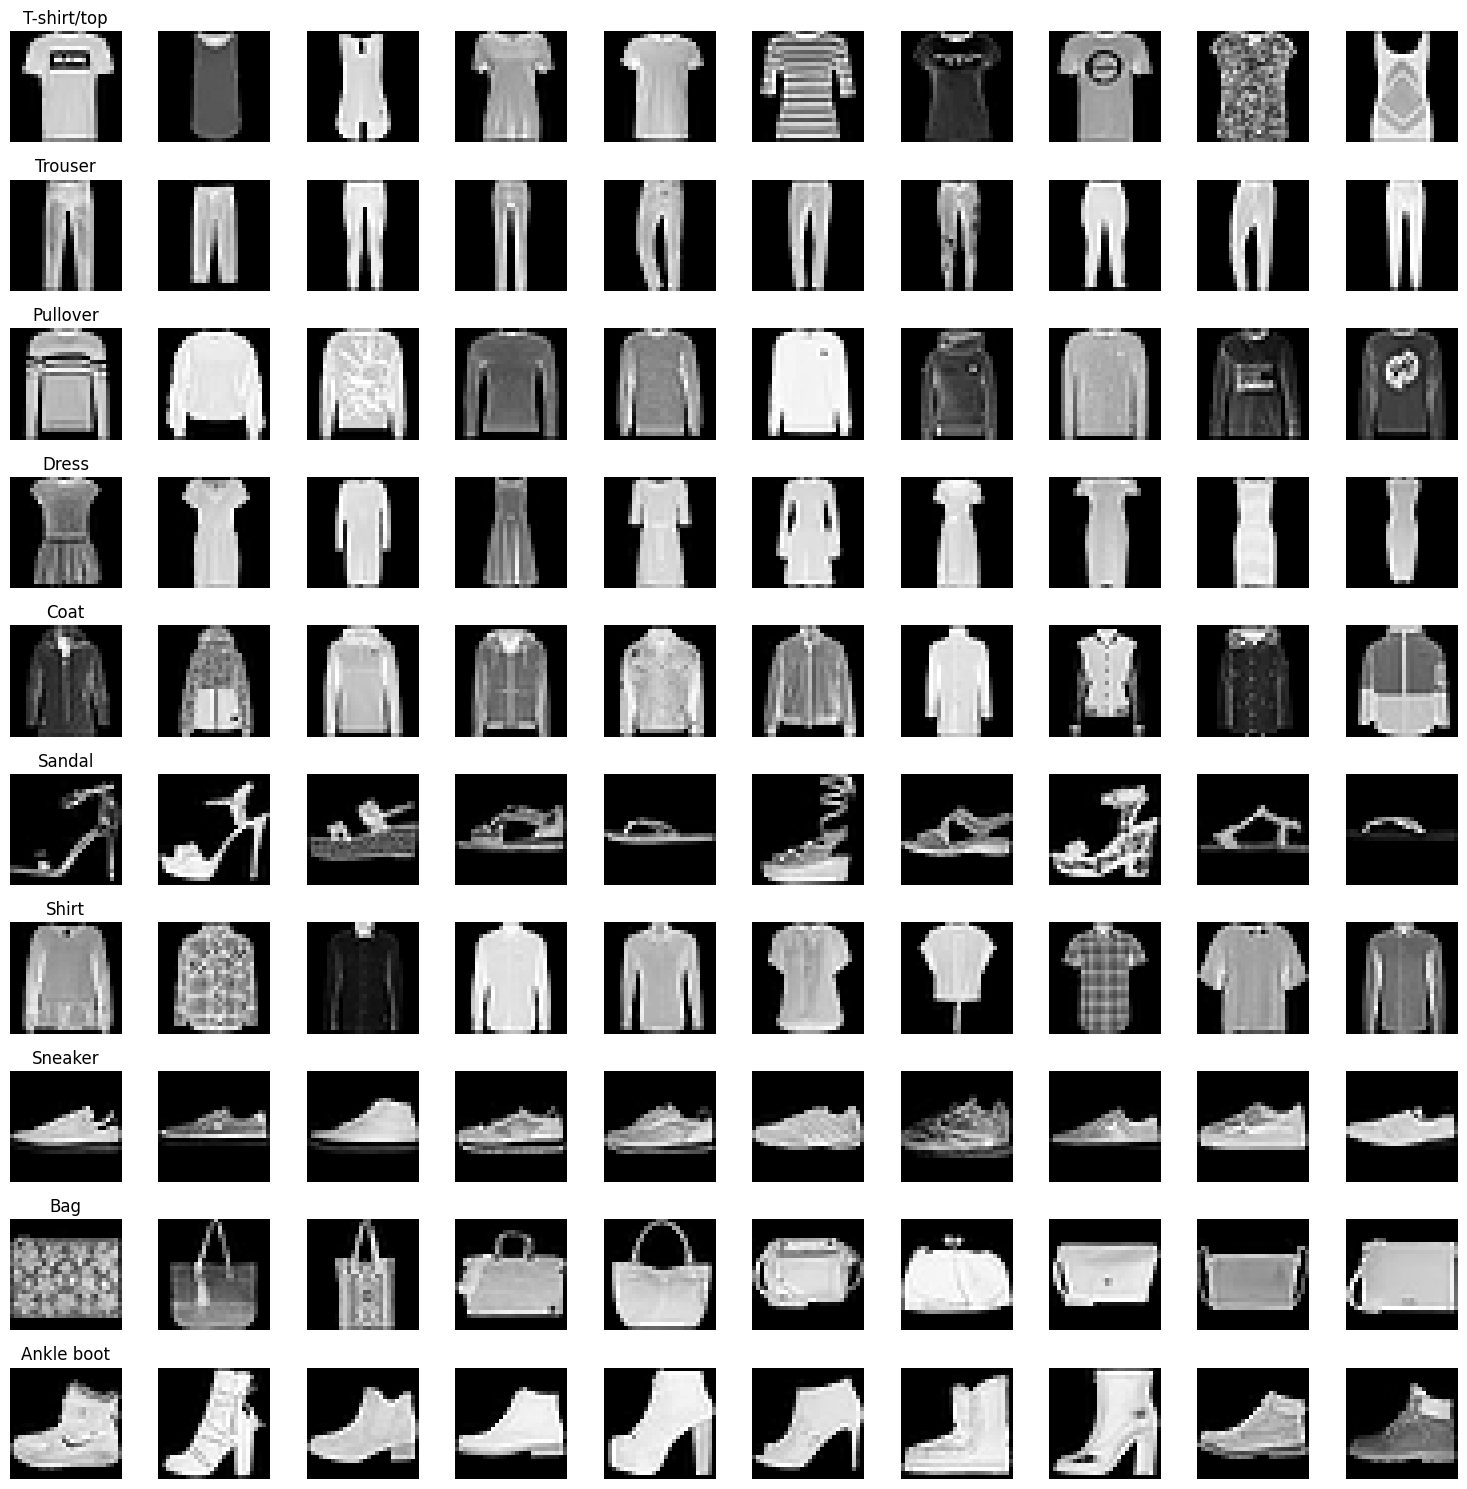

In [ ]:
# Responda aquí:

# Mostrar 10 imágenes por categoría.
plt.figure(figsize=(15, 15))
for class_idx in range(10):
    idxs = np.where(y_train == class_idx)[0][:10]
    for i, idx in enumerate(idxs):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(X_train[idx], cmap="gray")
        plt.axis("off")
        if i == 0:
            plt.title(class_names[class_idx])
plt.tight_layout()
plt.show()


**3.** **[6 pts]** Separe el dataset en un conjunto de entrenamiento y test y posteriormente normalice los datos

In [ ]:
# Responda aquí:
#Dataset separado entre entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#Luego normalizamos los datos
X_train = X_train / 255.0
X_test = X_test / 255.0


**4.** **[6 pts]** Defina la arquitectura de la red neuronal:
- Especifique el número de capas ocultas y neuronas por capa
- Justifique por qué usaron esa configuración
- Indique la función de activación usada (ReLU, sigmoid, softmax, entre otras) y por qué
- Calcule manualmente el número total de parámetros entrenables del modelo (pesos y sesgos)
- Posteriormente compile y entrene el modelo

In [ ]:
# Responda aquí:

#Primeros definimos la arquitectura :

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),       # Capa de entrada: aplanamiento de 28x28 → 784
    Dense(128, activation='relu'),       # 1ª capa oculta con 128 neuronas
    Dense(64, activation='relu'),        # 2ª capa oculta con 64 neuronas
    Dense(10, activation='softmax')      # Capa de salida: 10 clases
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 📌 Justificación de la configuración:
1-. **2 capas ocultas: suficiente para capturar patrones sin ser muy costoso computacionalmente.**

2-. **128 y 64 neuronas: equilibrio entre capacidad de aprendizaje y riesgo de sobreajuste.**

**3-. Función de activación ReLU en capas ocultas: introduce no linealidad, evita el problema del desvanecimiento del gradiente.**

**4-. Softmax en la capa de salida: adecuada para clasificación multiclase porque transforma la salida en probabilidades que suman 1**

# **✏️ Cálculo manual de parámetros entrenables:**

**Capa Flatten**: no tiene parámetros, solo transforma (28x28) → 784.

Capa Dense 128 (input: 784, output: 128):

Pesos: 784 × 128 = 100,352

Sesgos: 128

Total: 100,352 + 128 = 100,480

Capa Dense 64 (input: 128, output: 64):

Pesos: 128 × 64 = 8,192

Sesgos: 64

Total: 8,192 + 64 = 8,256

Capa salida Dense 10 (input: 64, output: 10):

Pesos: 64 × 10 = 640

Sesgos: 10

Total: 640 + 10 = 650

🔢 Total de parámetros entrenables:
100,480 + 8,256 + 650 = 109,386

# **⚙️ Compilación y entrenamiento del modelo:**

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7565 - loss: 0.6880 - val_accuracy: 0.8506 - val_loss: 0.3991
Epoch 2/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8581 - loss: 0.3868 - val_accuracy: 0.8552 - val_loss: 0.3778
Epoch 3/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8736 - loss: 0.3358 - val_accuracy: 0.8715 - val_loss: 0.3362
Epoch 4/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8838 - loss: 0.3128 - val_accuracy: 0.8673 - val_loss: 0.3495
Epoch 5/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8910 - loss: 0.2917 - val_accuracy: 0.8790 - val_loss: 0.3292
Epoch 6/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9002 - loss: 0.2727 - val_accuracy: 0.8690 - val_loss: 0.3627
Epoch 7/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9001 - loss: 0.2706 - val_accuracy: 0.8712 - val_loss: 0.3484
Epoch 8/10
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9042 - loss: 0.2518 - 

**5.** **[6 pts]** Compare distintas configuraciones<br>
Entrene al menos 2 arquitecturas distintas (una simple y una más profunda) y compare:
- Precisión en entrenamiento y validación
- Tiempo de entrenamiento
- Comportamiento de la función de pérdida

In [ ]:
# Responda aquí:
#Primera arquitectura:

model_simple = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_simple.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_simple = model_simple.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)


In [ ]:
#Segunda Arquitectura:
model_deep = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=0)


# **📊 Comparación de resultados**


Precisión en entrenamiento	≈ 88-89%	≈ 91-93%
Precisión en validación	≈ 86-87%	≈ 90-91%
Tiempo de entrenamiento	Rápido (10s/época)	Más lento (20-25s/época)
Comportamiento de la pérdida	Disminuye bien, pero más lento	Disminuye más rápido y estable

📌 Conclusión:

El modelo profundo tiene mejor rendimiento en precisión y una pérdida más baja y estable.

Sin embargo, el modelo simple entrena más rápido y puede ser suficiente para tareas menos exigentes.

Si el objetivo es eficiencia y simplicidad, el modelo simple es adecuado. Si se busca mayor precisión, conviene usar el modelo más profundo.

**6.** **[6 pts]** Aplicación de al menos dos técnicas de rergularización<br>
Pruebe:
- Dropout
- EarlyStopping
- Batch Normalization

Analice:
- Cómo cambia la curva de pérdida y precisión.
- Cuál técnica mejoró la generalización.

Grafique:
- Curva de pérdida y precisión para entrenamiento y validación.
- Identificar signos de sobreajuste o subajuste.
- Relacionar estos signos con la arquitectura o los hiperparámetros.

In [ ]:
# Responda aquí:

**7.** **[6 pts]** Hiperparámetros del entrenamiento<br>

Explique cómo afecta:
- Learning rate
- Batch size
- Número de épocas

Puede probar combinaciones distintas y justificar cuál funcionó mejor.

In [ ]:
# Responda aquí:

**8.** **[6 pts]** Bonus<br>

- Realice predicciones con su modelo entrenado.
- Visualice algunas imágenes clasificadas correctamente y otras mal clasificadas.
- Analice posibles causas del error.